In [21]:
# 數據
from sklearn import datasets
data = datasets.load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [22]:
# 數據解釋 X 就是影像被轉換成扁平的一階張量
data['data'][:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [23]:
# 數據解釋 y
data['target'][:3]

array([0, 1, 2])

(1797, 64)


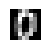

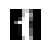

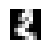

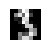

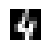

In [24]:
# 數據解釋
print(data['data'].shape)
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(0.4, 0.4))
    plt.imshow(data['data'][i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    plt.show()


In [25]:
# 數據解釋
from keras.utils import to_categorical
X = data['data']
y = data['target'].reshape(-1, 1)
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0, 1] 對應機率
data['target'], y

(array([0, 1, 2, ..., 8, 9, 8]),
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]]))

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


X = data['data']
y = data['target'].reshape(-1, 1)
y = to_categorical(y).astype('int') # 因為輸出的時候分成 [0, 1] 對應機率

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10分类问题，使用 softmax 激活函数
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# 训练模型
history = model.fit(X_train, y_train, epochs=10, batch_size=16, verbose = 2, validation_data=(X_test, y_test))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'测试集上的损失：{loss}')
print(f'测试集上的准确率：{accuracy}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 6570 (25.66 KB)
Trainable params: 6570 (25.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
90/90 - 1s - loss: 1.4749 - accuracy: 0.5616 - val_loss: 0.8232 - val_accuracy: 0.8250 - 736ms/epoch - 8ms/step
Epoch 2/10
90/90 - 0s - loss: 0.5077 - accuracy: 0.9088 - val_loss: 0.3064 - val_accuracy: 0.9167 - 115ms/epoch - 1ms/step
Epoch 3/10
90/90 - 0s - loss: 0.2166 -

In [27]:
print(history.history.keys())
history.history['accuracy'][:3]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.5615866184234619, 0.9088378548622131, 0.9568545818328857]

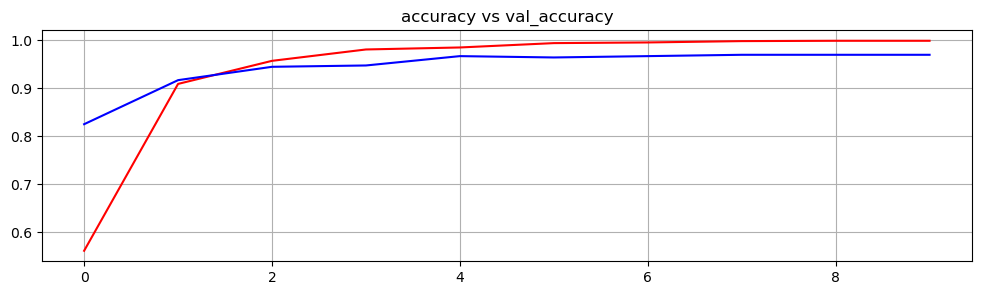

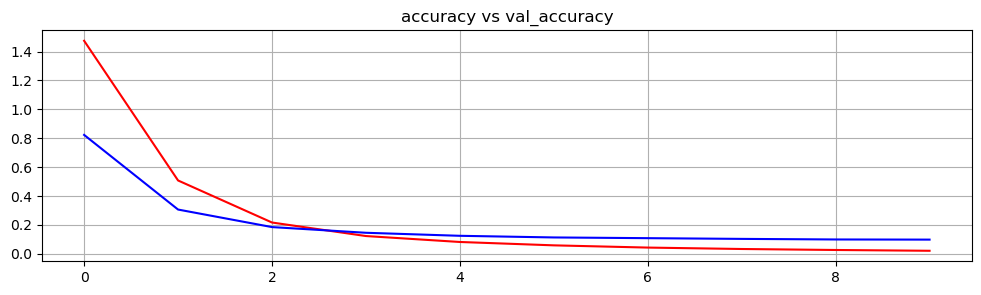

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

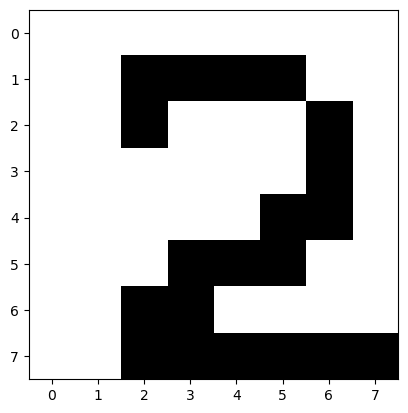

(8, 8, 4)


In [29]:
# 怎樣辨識自己寫的數字
test = plt.imread('./88.png')
plt.imshow(test)
plt.show()
print(test.shape)

### (util.invert( ))

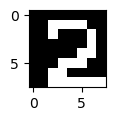

(8, 8)
1/1 [==============================] - 0s 43ms/step
2


In [30]:
# 怎樣辨識自己寫的數字
import matplotlib.pyplot as plt
from skimage import util
from skimage import data, color
from skimage.transform import resize
plt.figure(figsize=(1, 1))
test = util.invert(resize( color.rgb2gray(plt.imread('./88.png')[:, :, :3]), (8, 8)  ,
                   anti_aliasing=True))

plt.imshow(test, cmap='gray')
plt.show()
print(test.shape)
print(np.argmax(model.predict(test.reshape(1, 64))))